# Keywords extractor
This project demonstrates one way of extracting keywords based on their frequencies in a text. The works of William Shakespeare (gathered from: https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt) is used in this project.

### Import necessary libraries

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
sns.set_style("white")
%matplotlib inline

### Extractor implementation

In [8]:
def extract_keywords(text :str):
    '''
    Extracts keywords and their respective frequencies.

    Parameters
    ----------
    text : str

    Returns
    ------
    word_frequencies : dict
    '''

    # Split the text into words
    words = word_tokenize(text.lower())

    # Remove stopwords (eg. him don't having ...)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]

    # Calculate word frequencies
    word_frequencies = {}
    for word in filtered_words:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1

    return word_frequencies

### Create separate files for each piece of literature 

In [9]:
with open('novel.txt', 'r') as f:
    text = f.read()
novel_lst = text.split('''
<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>''')
for i, txt in enumerate(novel_lst):
    file_output = f"out_{i}.txt"
    with open(file_output, "w") as f:
        f.write(txt)

### Investigate a random file

In [10]:
rand = random.randint(0,len(novel_lst)-1)
with open(f'out_{rand}.txt', 'r') as f:
    text = f.read()
keywords_dict = extract_keywords(text)
print(f'{len(keywords_dict)} Unique words have been stored.')

784 Unique words have been stored.


### Create a DataFrame of the output

In [11]:
df = pd.DataFrame.from_dict(keywords_dict, orient='index').reset_index()
df.columns=['word','frequency']
df_sorted = df.sort_values(by='frequency',ascending=False)[:10]
df_sorted.head()


,word,frequency
12,gentleman,47
395,griffith,23
83,katharine,22
11,first,20
15,second,19


### Visualization

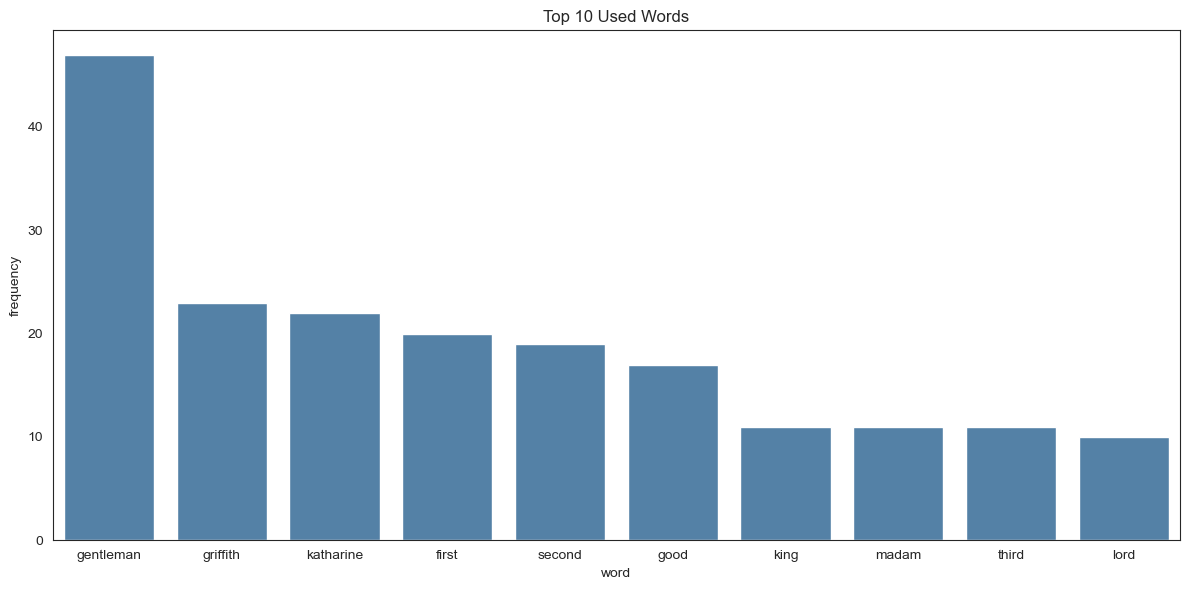

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted['word'], y=df_sorted['frequency'], color='steelblue')
plt.title("Top 10 Used Words")
plt.tight_layout()